# Get Started

## Preliminary work

1. Load the eventstudy module and its dependencies: numpy and matplotlib:

In [2]:
# To be able to load package from parent folders
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

# It starts here
import eventstudy as es
from eventstudy import excelExporter

import numpy as np
import matplotlib.pyplot as plt

2. Set the parameters needed for your events: the returns and Fama-French factors (using es.import_returns()and es.import_FamaFrench()):

In [3]:
es.Single.import_returns('returns_small.csv')
es.Single.import_FamaFrench('famafrench.csv')

## Example 1: A single event

As an introductory example, we will compute the event study analysis of the announcement of the first iphone, made by Steve Jobs during MacWorld exhibition, on January 7, 2007.

1. Run the event study, here using the Fama-French 3-factor model:

In [5]:
event = es.Single.market_model(
    security_ticker = 'AAPL',
    market_ticker = 'SPY',
    event_date = np.datetime64('2007-01-09'),
    event_window = (-5,+20), 
    estimation_size = 300,
    buffer_size = 30
)

2. Display results:
    - In a plot:
        - grey area: confidence interval (here at 90%)
        - blue line: CAAR
        - black bars: AR (displayed because AR parameter is set as True)

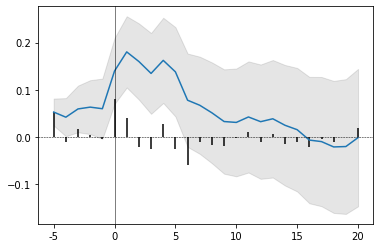

In [7]:
event.plot(AR=True)
plt.show()

2. Or in a table:

In [9]:
event.results(decimals=[3,5,3,5,2,2])

,AR,Variance AR,CAR,Variance CAR,T-stat,P-value
-5,0.053,0.00049,0.053 **,0.00049,2.39,0.01
-4,-0.011,0.00049,0.042 *,0.00099,1.34,0.09
-3,0.017,0.00049,0.06 *,0.00148,1.55,0.06
-2,0.004,0.00049,0.063 *,0.00197,1.43,0.08
-1,-0.003,0.00049,0.06,0.00247,1.21,0.11
0,0.080,0.00049,0.14 **,0.00296,2.57,0.01
1,0.040,0.00049,0.18 ***,0.00345,3.07,0.00
2,-0.020,0.00049,0.16 **,0.00394,2.55,0.01
3,-0.025,0.00049,0.135 **,0.00444,2.02,0.02
4,0.028,0.00049,0.162 **,0.00493,2.31,0.01


## Example 2: A sample of events

In [10]:
AAPL_10K = es.Multiple.from_csv(
    'AAPL_10K.csv',
    es.Single.FamaFrench_3factor,
    event_window = (-10,+10),
    date_format = '%d/%m/%Y'
)

Tips: Get more details on errors by calling EventStudyBatch.error_report() method or by exploring EventStudyBatch.errors class variable.


In [11]:
print(AAPL_10K.error_report())

Error Report

3 errors due to data unavailability.
The respective events was not processed and thus removed from the sample.
It does not affect the computation of other events.

Help 1: Check if the company was quoted at this date, 
Help 2: For event study modelised used Fama-French models,
        check if the Fama-French dataset imported is up-to-date.
Tips:   Re-import all parameters and re-run the event study analysis.

Details
(You can find more details on errors in the documentation.)

Error              Date                       Parameters                             
------------------ -------------------------- -----------------------------------------
DateMissingError   2019-10-05T00:00:00.000000 security_ticker: AAPL; market_ticker: SPY
Description: Date (2019-10-05T00:00:00.000000) is missing in parameter: FamaFrench.

DateMissingError   2019-10-05T00:00:00.000000 security_ticker: MSFT; market_ticker: SPY
Description: Date (2019-10-05T00:00:00.000000) is missing in paramet

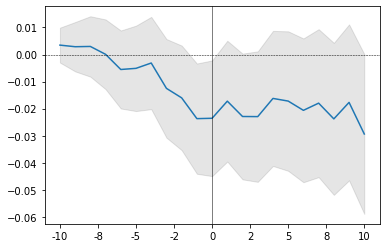

,Mean,Variance,Kurtosis,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.0035,0.0011,9.2783,-0.0721,-0.0060,-0.0009,0.0051,0.1387
-9,0.0029,0.0015,6.2955,-0.1249,-0.0096,0.0035,0.0101,0.1306
-8,0.0030,0.0030,2.9118,-0.1589,-0.0206,-0.0044,0.0196,0.1518
-7,0.0001,0.0043,2.5740,-0.2057,-0.0251,-0.0074,0.0264,0.1525
-6,-0.0055,0.0060,2.3077,-0.2237,-0.0268,0.0028,0.0231,0.1497
-5,-0.0051,0.0058,1.5730,-0.2068,-0.0312,0.0069,0.0247,0.1548
-4,-0.0031,0.0069,1.3944,-0.2072,-0.0343,0.0055,0.0347,0.2080
-3,-0.0125,0.0076,0.3780,-0.2120,-0.0545,-0.0013,0.0395,0.1905
-2,-0.0160,0.0071,0.4174,-0.2214,-0.0588,-0.0036,0.0350,0.1749
-1,-0.0237,0.0073,-0.5522,-0.2001,-0.0675,-0.0264,0.0214,0.1314


In [12]:
AAPL_10K.plot()
plt.show()

In [13]:
AAPL_10K.results(decimals = [3,5,3,5,2,2])

,AAR,Variance AAR,CAAR,Variance CAAR,T-stat,P-value
-10,0.003,0.00003,0.003,0.00003,0.69,0.25
-9,-0.001,0.00003,0.003,0.00005,0.40,0.34
-8,0.000,0.00003,0.003,0.00008,0.34,0.37
-7,-0.003,0.00003,0.0,0.00010,0.01,0.50
-6,-0.006,0.00003,-0.006,0.00013,-0.49,0.31
-5,0.000,0.00003,-0.005,0.00015,-0.42,0.34
-4,0.002,0.00003,-0.003,0.00018,-0.24,0.41
-3,-0.009,0.00003,-0.013,0.00020,-0.88,0.19
-2,-0.004,0.00003,-0.016,0.00023,-1.06,0.14
-1,-0.008,0.00003,-0.024 *,0.00025,-1.49,0.07


In [14]:
AAPL_10K.get_CAR_dist(4)

,Mean,Variance,Kurtosis,Min,Quantile 25%,Quantile 50%,Quantile 75%,Max
-10,0.0035,0.0011,9.2783,-0.0721,-0.0060,-0.0009,0.0051,0.1387
-9,0.0029,0.0015,6.2955,-0.1249,-0.0096,0.0035,0.0101,0.1306
-8,0.0030,0.0030,2.9118,-0.1589,-0.0206,-0.0044,0.0196,0.1518
-7,0.0001,0.0043,2.5740,-0.2057,-0.0251,-0.0074,0.0264,0.1525
-6,-0.0055,0.0060,2.3077,-0.2237,-0.0268,0.0028,0.0231,0.1497
-5,-0.0051,0.0058,1.5730,-0.2068,-0.0312,0.0069,0.0247,0.1548
-4,-0.0031,0.0069,1.3944,-0.2072,-0.0343,0.0055,0.0347,0.2080
-3,-0.0125,0.0076,0.3780,-0.2120,-0.0545,-0.0013,0.0395,0.1905
-2,-0.0160,0.0071,0.4174,-0.2214,-0.0588,-0.0036,0.0350,0.1749
-1,-0.0237,0.0073,-0.5522,-0.2001,-0.0675,-0.0264,0.0214,0.1314
